<a href="https://colab.research.google.com/github/Jorgee18/ADA-Informes/blob/main/Arbol_binario_de_b%C3%BAsqueda_%C3%B3ptimo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Problema de optimizacion**
**Entrada**: Secuencia ordenada de n claves: $K=\left<k_1,k_2,...,k_n\right>$. Cada clave $k_i$ tiene una probabilidad $p_i$ de ser buscada. Existen claves ficticias $d_i$ que representan búsquedas fallidas con $k_{i-1} \leq d_i \leq k_i$. Cada clave $d_i$ tiene una probabilidad $q_i$ de ser buscada. La suma de probabilidades debe ser uno, es decir: $\sum\limits_{i=1}^n p_i + \sum\limits_{j=0}^n q_i = 1$

**Salida**: Construir un árbol de búsqueda óptimo, es decir, un árbol que minimice la cantidad esperada de nodos visitados (costo esperado). 

El Arbol binario de busqueda optimo es un arbol que proporciona un tiempo de busqueda lo mas pequeño posible para una secuencia dada en este caso la entrada antes mencionada, para hacer realidad esto se hace uso de dos tipos de programacion, una dinamica y otra recursiva. La finalidad de este algoritmo es crear un arbol que minimice la cantidad esperada de nodos visitados.

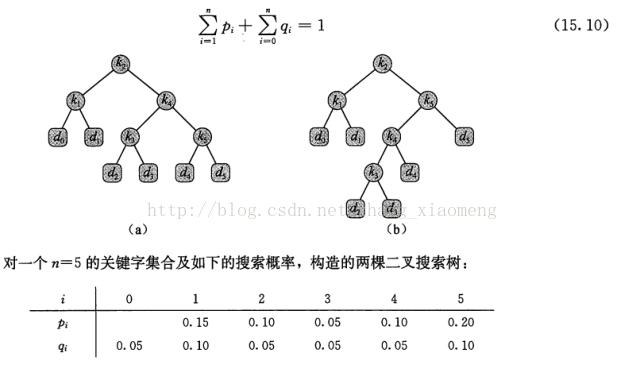

# 2. Descripcion del algoritmo

Arbol binario de búsqueda óptimo funcionara de la siguiente manera:

1. Primeramente se crea un matriz auxiliar que guardara los valores.

2. Se realiza una comparacion segun los nodos, si tenemos un nodo donde el coste es igual a la frecuencia del nodo y el segundo caso para cuando tenemos mas de un nodo donde su frecuencia es igual al coste, calculandose su respectivo coste.

3. Se guardan los valores iterativamente.

Arbol binario de búsqueda óptimo con programacion dinamica a diferencia del recurisvo este es modificable en cualquier momento de su ejecucion permitiendo rotaciones de arboles. Tiene una ventaja en su complejidad a comparacion del Arbol binario de búsqueda óptimo recursivo debido a que por medio del guardado de las operaciones anteriormente hechas, no es necesario el resolverlas nuevamente logrando asi un clara ventaja en comparacion de crear este algoritmo de manera recursiva.

Arbol binario de búsqueda óptimo con programacion recursiva el arbol puede ser modificado unicamente una sola vez que este ha sido construido. Este tipo de programacion es bastante ineficiente a comparacion de la programacion dinamica debido a que trantando de cumplir la misma funcion en este caso el costo optimo debe de resolver todos los subproblemas anteriores al actual debido a que estos no fueron almacenados en ninguna variable auxiliar, es por ello que aumentan significativamente su complejidad pero "optimizan" su memoria.

# 2.2 Algoritmo 



In [ ]:
import random as rd
import matplotlib.pyplot as plt
import datetime
import math as mt
from timeit import repeat
from termcolor import colored
import numpy as np


In [ ]:
# A naive recursive implementation of
# optimal binary search tree problem

# A recursive function to calculate
# cost of optimal binary search tree
def optCost(freq, i, j):
	
	# Base cases
	if j < i:	 # no elements in this subarray
		return 0
	if j == i:	 # one element in this subarray
		return freq[i]
	
	# Get sum of freq[i], freq[i+1], ... freq[j]
	fsum = Sum(freq, i, j)
	
	# Initialize minimum value
	Min = 999999999999
	
	# One by one consider all elements as
	# root and recursively find cost of
	# the BST, compare the cost with min
	# and update min if needed
	for r in range(i, j + 1):
		cost = (optCost(freq, i, r - 1) +
				optCost(freq, r + 1, j))
		if cost < Min:
			Min = cost
	
	# Return minimum value
	return Min + fsum

# The main function that calculates minimum
# cost of a Binary Search Tree. It mainly
# uses optCost() to find the optimal cost.
def optimalSearchTree(keys, freq, n):
	
	# Here array keys[] is assumed to be
	# sorted in increasing order. If keys[]
	# is not sorted, then add code to sort
	# keys, and rearrange freq[] accordingly.
	return optCost(freq, 0, n - 1)

# A utility function to get sum of
# array elements freq[i] to freq[j]
def Sum(freq, i, j):
	s = 0
	for k in range(i, j + 1):
		s += freq[k]
	return s

# Driver Code
if __name__ == '__main__':
	keys = [10, 12, 20]
	freq = [34, 8, 50]
	n = len(keys)
	print("Cost of Optimal BST is",
		optimalSearchTree(keys, freq, n))
	


Cost of Optimal BST is 142


In [ ]:
# Dynamic Programming code for Optimal Binary Search
# Tree Problem

INT_MAX = 2147483647

""" A Dynamic Programming based function that
calculates minimum cost of a Binary Search Tree. """
def optimalSearchTree(keys, freq, n):

	""" Create an auxiliary 2D matrix to store
		results of subproblems """
	cost = [[0 for x in range(n)]
			for y in range(n)]

	""" cost[i][j] = Optimal cost of binary search
	tree that can be formed from keys[i] to keys[j].
	cost[0][n-1] will store the resultant cost """

	# For a single key, cost is equal to
	# frequency of the key
	for i in range(n):
		cost[i][i] = freq[i]

	# Now we need to consider chains of
	# length 2, 3, ... . L is chain length.
	for L in range(2, n + 1):
	
		# i is row number in cost
		for i in range(n - L + 2):
			
			# Get column number j from row number
			# i and chain length L
			j = i + L - 1
			off_set_sum = sum(freq, i, j)
			if i >= n or j >= n:
				break
			cost[i][j] = INT_MAX
			
			# Try making all keys in interval
			# keys[i..j] as root
			for r in range(i, j + 1):
				
				# c = cost when keys[r] becomes root
				# of this subtree
				c = 0
				if (r > i):
					c += cost[i][r - 1]
				if (r < j):
					c += cost[r + 1][j]
				c += off_set_sum
				if (c < cost[i][j]):
					cost[i][j] = c
	return cost[0][n - 1]


# A utility function to get sum of
# array elements freq[i] to freq[j]
def sum(freq, i, j):

	s = 0
	for k in range(i, j + 1):
		s += freq[k]
	return s
	
# Driver Code
if __name__ == '__main__':
	keys = [10, 12, 20]
	freq = [34, 8, 50]
	n = len(keys)
	print("Cost of Optimal BST is",
		optimalSearchTree(keys, freq, n))


# 2.3. Ejemplo
Ejemplo de un arreglo y las comparaciones que hace.

1 , 1 , 
3 , 3 , 
2 , 2 , 
6 , 6 , 
2 , 2 , 6
5 , 5 , 
2 , 2 , 5, 6
3 , 3 , 
[1, 2, 3, 5, 6]


# 2.4. Ejecucion del algoritmo paso a paso (verbose=True)
Debido a esta opcion podemos ver el funcionamiento paso a paso en cada iteracion.

En cada iteracion se recorre:

*   Elemento de la lista
*   Elemento de la lista

Color amarillo: Numero actual que se esta comparando.

Color verde: Numeros que se estan realizando un cambio.

# 3. Tiempo de ejecucion
## **Teorema (Tiempo de ejecucion).**

Peor caso.

## Prueba del teorema

# 4. Correctitud

### **Teorema (Correctitud).**

## Prueba del Teorema

**Inicializacion**

**Mantencion**

# 5. Experimentos

## 5.1. Número de comparaciones

A continuación se muestra gráficamente una comparación entre:

* cantidad de comparaciones del peor caso calculadas matemáticamente,
* cantidad de comparaciones del mejor caso calculadas matemáticamente (n-1 comparaciones si el arreglo está ordenado)
* cantidad de comparaciones realizadas experimentalmente para entradas aleatorias

para tamaños de problemas con $n \in [5,100]$.

Los arreglos de entrada son:

*   Mejor caso: La secuencia será un arreglo ordenado de $0$ hasta $n-1$.
*   Peor caso: La secuencia será un arreglo ordenado de $n-1$ hasta $0$.
*   Caso aleatorio: La secuencia será un arreglo aleatorio de números entre 1 y 99, con $n$ cantidad de elementos.

Como ejemplo del mejor y peor caso, se pueden observar las demostraciones anteriores, donde $n$ es reemplazado por 5.

### Análisis de resultados

#5.2. Tiempo de ejecucion (experimental)

**Analisis de resultados**